In [4]:
from __future__ import absolute_import, division, print_function, unicode_literals
import pandas as pd
import numpy as np 
from IPython.display import clear_output 
from six.moves import urllib
import tensorflow as tf
import tensorflow.compat.v2.feature_column as fc



In [15]:
dftrain = pd.read_csv('G:/projects/tensorflow/data/train.csv') #importing training data
dfeval = pd.read_csv('G:/projects/tensorflow/data/eval.csv')   #importing testing data
# print(dftrain.head())    #prints the first 5 elements of the dftrain dataset
# print(dfeval.head())     #prints the first 5 values of the dfeval dataset
y_train = dftrain.pop('survived')     #this statemnet pops the survived column from dftrain dataset and store it in y_train variable which also is our training label
y_eval = dfeval.pop('survived')       #this statemnet pops the survived column from dfeval dataset and store it in y_eval variable which also is our testing label

In [26]:
# print(dftrain.loc[0],y_train.loc[0]) #loc prints the rows which ever you wish to such as we print a element in array
# print(dftrain["age"])  #printing a specific column we need to name the column name and we are good to go 
# dftrain.head() #prints the first 5 entries of the dataset
# dftrain.describe()      # this describes the number of entries and their mean standard deviation and all that stuff


<AxesSubplot:>

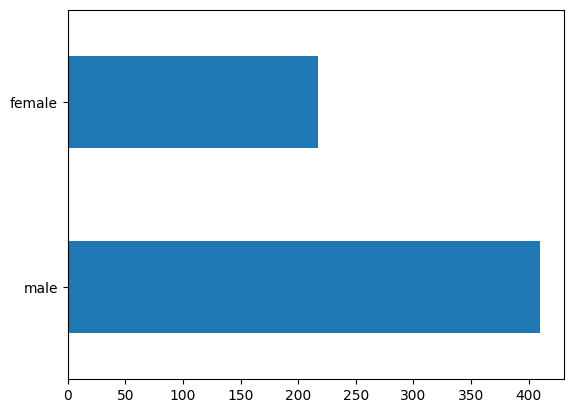

In [44]:
# dftrain.age.hist(bins=20) # ploting a histogram which shows 20 elements
dftrain.sex.value_counts().plot(kind='barh')  # this statement prints the value of male and female

<AxesSubplot:>

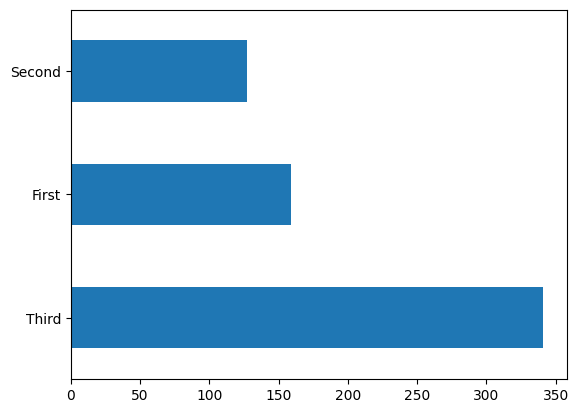

In [46]:
dftrain["class"].value_counts().plot(kind ='barh')

In [69]:
# pd.concat([dftrain,y_train],axis =1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% survive') #this tells the survial rate according to whatever standard you choose her i chose class and age 
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [76]:



feature_columns = []
CATEGORICAL_COLUMNS = ['class','deck','embark_town','alone','n_siblings_spouses','parch','sex']
NUMERIC_COLUMNS = ['fare','age']
for feature_name in CATEGORICAL_COLUMNS:
    vocabulary = dftrain[feature_name].unique() #gets a list of all unique values from given feature column
    feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name , vocabulary))
for feature_name in NUMERIC_COLUMNS:
    feature_columns.append(tf.feature_column.numeric_column(feature_name , dtype=tf.float32))

print(feature_columns)
# dftrain['age'].unique()

array([22.  , 38.  , 26.  , 35.  , 28.  ,  2.  , 27.  , 14.  ,  4.  ,
       20.  , 39.  , 31.  , 19.  , 40.  , 66.  , 42.  ,  3.  , 18.  ,
        7.  , 49.  , 29.  , 65.  , 21.  , 28.5 , 11.  , 45.  , 17.  ,
       32.  , 25.  ,  0.83, 30.  , 16.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 34.  , 33.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 ,  9.  ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 50.  , 36.  , 58.  , 20.5 ,
       41.  , 63.  , 43.  , 61.  , 15.  , 60.  , 64.  ,  5.  , 52.  ,
       48.  , 56.  ,  0.75, 54.  , 62.  , 53.  , 57.  , 80.  ,  6.  ,
       70.  , 30.5 , 10.  , 34.5 ])